# Undistort and Transform Perspective
<span style="color:red">Check 'wide_dist_pickle.p' is in the same folder</span>

**Goal is to generate output like the image shown below**

<img src = "https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582e3bec_undist-and-warp/undist-and-warp.png">

## Step by Step Implementaion

### Import checkboard image

(960, 1280, 3)


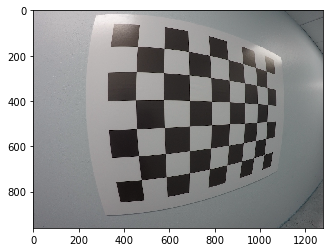

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

print(img.shape)
plt.imshow(img)

### Undistort , gray convert

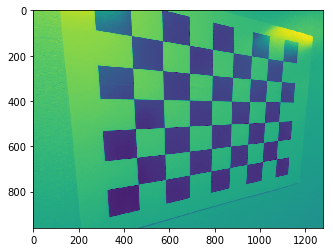

In [39]:
# 1) Undistort using mtx and dist
img_undistort = cv2.undistort(img, mtx, dist, None, mtx)
# 2) Convert to grayscale
# gray = cv2.cvtColor(img_undistort, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img_undistort, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### Find corners and do perspective transform

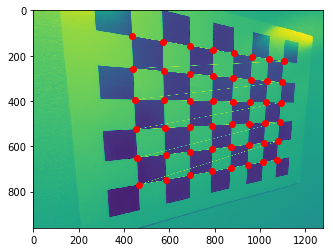

In [42]:
# 3) Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

# 4) If corners found:
if ret == True:
        # a) draw corners
        img_gray = np.copy(gray)
        cv2.drawChessboardCorners(img_gray, (nx,ny), corners, ret)      
        plt.imshow(img_gray)
        offset = 100 # offset for dst points
        img_size = (gray.shape[1], gray.shape[0])
        
        for corner in corners :
            plt.plot(corner[0,0],corner[0,1],'ro')  ##  corners.shape (48,1,2)     
        
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        #Note: you could pick any four of the detected corners 
        # as long as those four corners define a rectangle
        #One especially smart way to do this would be to use four well-chosen
        # corners that were automatically detected during the undistortion steps
        #We recommend using the automatic detection of corners in your code
        src = np.float32([corners[0], corners[nx-1], corners[-1] , corners[-nx]]) ## src.shape(4, 1, 2)
        
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[offset,offset],
                          [img_size[0] - offset,offset],
                          [img_size[0] - offset,img_size[1] - offset],
                          [offset ,img_size[1] - offset ]])
        
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform( src , dst)
        
        # e) use cv2.warpPerspective() to warp your image to a top-down view
#         warped = cv2.warpPerspective(img_gray, M, img_size, flag = cv2.INTER_LINEAR)
        warped = cv2.warpPerspective(img_gray, M, img_size)

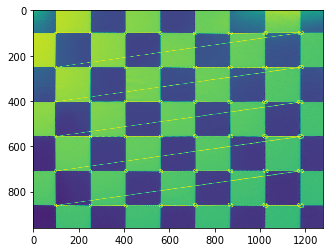

In [43]:
     plt.imshow(warped)

## Implement as a function

In [36]:
## example solution
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

### Function call and plot result

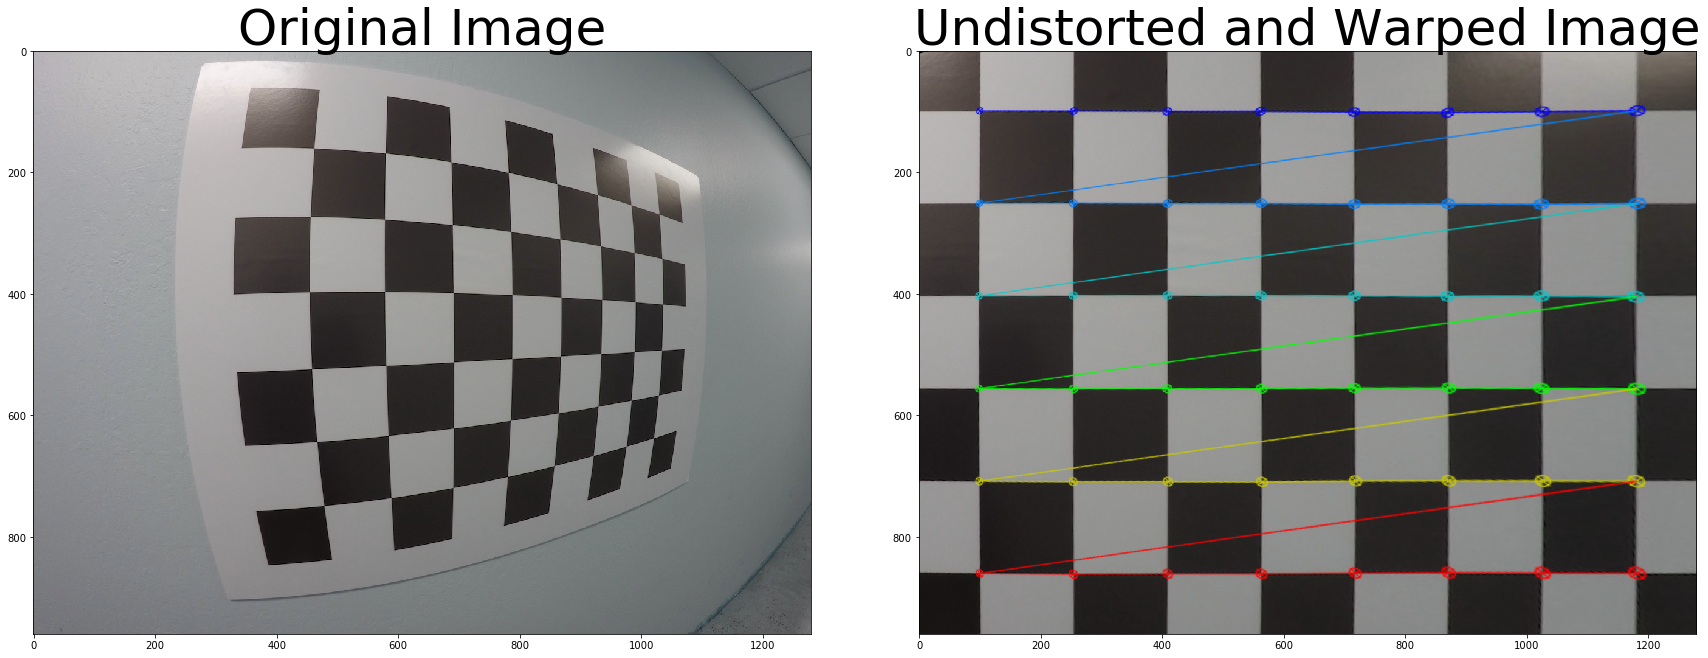

In [37]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)